In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read october data
dataoct = pd.read_csv('ecommerce/2019-Oct.csv')

In [5]:
#check the columns of the imported data
dataoct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 281.7+ MB


In [6]:
dataoct.shape

(4102283, 9)

In [7]:
#load Nov dataset
datanov = pd.read_csv('ecommerce/2019-Nov.csv')

In [8]:
datanov.shape

(4635837, 9)

In [9]:
datanov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [10]:
#convert into right data types
dataoct['event_type'] = dataoct['event_type'].astype('category')

In [11]:
dataoct['event_time'] = pd.to_datetime(dataoct['event_time'], errors='ignore', infer_datetime_format=True) 


In [12]:
dataoct['category_code'] = dataoct['category_code'].astype('category', errors='ignore')

In [13]:
dataoct.dtypes

event_time       datetime64[ns]
event_type             category
product_id                int64
category_id               int64
category_code          category
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

In [14]:
datanov['event_type'] = datanov['event_type'].astype('category')

In [15]:
datanov['category_code'] = datanov['category_code'].astype('category', errors='ignore')

In [16]:
datanov['event_time'] = pd.to_datetime(datanov.event_time, errors='ignore', infer_datetime_format=True)

In [17]:
datanov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
event_time       datetime64[ns]
event_type       category
product_id       int64
category_id      int64
category_code    category
brand            object
price            float64
user_id          int64
user_session     object
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 256.4+ MB


In [18]:
#drop duplicate rows. first check the rows that are duplicate
dataoct[dataoct.duplicated(keep=False)].head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
12,2019-10-01 00:00:30,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
13,2019-10-01 00:00:30,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
29,2019-10-01 00:01:05,remove_from_cart,5858981,1487580007634043851,NaN,de.lux,0.79,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
30,2019-10-01 00:01:05,remove_from_cart,5858981,1487580007634043851,NaN,de.lux,0.79,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
34,2019-10-01 00:01:07,remove_from_cart,5312,1487580009471148064,NaN,runail,1.27,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
36,2019-10-01 00:01:07,remove_from_cart,5312,1487580009471148064,NaN,runail,1.27,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
37,2019-10-01 00:01:10,remove_from_cart,5823915,1487580007432717250,NaN,milv,1.59,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
38,2019-10-01 00:01:10,remove_from_cart,5823915,1487580007432717250,NaN,milv,1.59,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
50,2019-10-01 00:01:24,remove_from_cart,5664641,1487580011425693811,NaN,NaN,0.70,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
51,2019-10-01 00:01:24,remove_from_cart,5664641,1487580011425693811,NaN,NaN,0.70,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [19]:
dataoct1 = dataoct.drop_duplicates()

In [20]:
dataoct1.shape

(3889128, 9)

In [21]:
#find missing values in columns 
assert dataoct1.event_time.notnull().all()


In [22]:
assert dataoct1.event_type.notnull().all()

In [23]:
assert dataoct1.product_id.notnull().all()

In [24]:
assert dataoct1.category_id.notnull().all()

In [25]:
assert dataoct1.category_code.notnull().all() #this gives an error which means there are null values

AssertionError: 

In [26]:
#check that price does not have null values
assert pd.notnull(dataoct1.price).all()

In [27]:
assert dataoct1.user_session.notnull().all().all()

AssertionError: 

In [28]:
# find how many null sessions are there
len(dataoct1[dataoct1.user_session.isnull()])

574

In [29]:
assert dataoct1.brand.notnull().all().all() #has null values

AssertionError: 

In [30]:
#find the null brand count - it is huge
dataoct1.brand.value_counts(dropna=False)

NaN        1571314
runail      287149
irisk       213301
masura      182845
grattol     125856
            ...   
gena             2
dessata          2
shifei           1
pueen            1
ikoo             1
Name: brand, Length: 241, dtype: int64

In [31]:
dataoct1.user_session.value_counts(dropna=False)

dee05e29-f331-48dc-b1b3-547985fc2aa4    1486
e8d6736d-0247-4d1a-ae3b-6e6637288e37    1156
346dd83e-e8f0-69df-085a-0cf4a806d70d     959
a71b67a2-7826-4853-af0d-fa06e3734374     879
d7998d70-7562-4ff0-8870-5ace290db2c9     857
                                        ... 
748f4504-219f-45ec-9945-407d9b30c1ad       1
76b49758-c6b0-4000-ac9e-67b0affa2b60       1
e573d1f8-a556-4ddd-909b-07db2e23af34       1
a0a1af80-d18b-4c09-b3a3-3fcb122633e1       1
c4f5c86c-f4e9-426b-97f1-8d4855723922       1
Name: user_session, Length: 873961, dtype: int64

In [32]:
#find the rows with null brand values
nullbrand = dataoct1[dataoct1.brand.isnull()]
nullbrand.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7,2019-10-01 00:00:24,cart,5825598,1487580009445982239,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25,cart,5698989,1487580006317032337,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
9,2019-10-01 00:00:26,view,5875317,2029082628195353599,NaN,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
14,2019-10-01 00:00:32,remove_from_cart,5779403,1487580013506068678,NaN,NaN,12.22,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
15,2019-10-01 00:00:33,remove_from_cart,5779403,1487580013506068678,NaN,NaN,12.22,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [33]:
nullbrand.brand.value_counts(dropna=False)

NaN    1571314
Name: brand, dtype: int64

In [34]:
#find if the product ids in nullbrand exists in notnullbrand series
brandnotnull = dataoct1[dataoct1.brand.notnull()]
brandnotnull.shape

(2317814, 9)

In [35]:
#finding the product ids that are common between null and notnull brands dataset
commonprods = pd.Series(list(set(nullbrand.product_id) & set(brandnotnull.product_id)))
commonprods.head(10)

0    5898240
1    5898241
2    5898242
3    5898243
4    5898244
5    5898245
6    5898246
7    5898247
8    5900288
9    5900291
dtype: int64

In [36]:
len(commonprods)

590

In [37]:
#create dictionary to map product_id and its brand
branddict = dict(zip(brandnotnull['product_id'], brandnotnull['brand']))
len(branddict)

23987

In [38]:
#store count of rows with null brands in dataoct1
noofnullbrands = len(dataoct1.brand[dataoct1.brand.isnull()])
noofnullbrands

1571314

In [39]:
#fill the null brands from the dictionary
dataoct1.brand = dataoct1.product_id.map(branddict)
len(dataoct1.brand[dataoct1.brand.isnull()])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1568545

In [40]:
#no of rows that got filled with brand 
noofnullbrands - len(dataoct1.brand[dataoct1.brand.isnull()])

2769

In [41]:
dataoct2 = dataoct1.copy()

In [42]:
#fill all missing brands with vale missing
dataoct2.brand = dataoct2.brand.fillna('missing')

In [43]:
dataoct2.brand.value_counts(dropna=False)

missing    1568545
runail      287166
irisk       213644
masura      182990
grattol     125870
            ...   
gena             2
dessata          2
shifei           1
ikoo             1
pueen            1
Name: brand, Length: 241, dtype: int64

In [44]:
#product_id does not have null values
dataoct2.product_id.value_counts(dropna=False)

5809910    10411
5892179    10015
5700037     8655
5751383     8261
5877454     8151
           ...  
5869901        1
5900281        1
5603535        1
5565990        1
5771071        1
Name: product_id, Length: 41899, dtype: int64

In [45]:
dataoct2.category_code.value_counts(dropna=False)

NaN                                       3823749
appliances.environment.vacuum               27079
stationery.cartrige                         12747
apparel.glove                                7036
furniture.living_room.cabinet                6141
accessories.bag                              5814
furniture.bathroom.bath                      4849
appliances.personal.hair_cutter               820
accessories.cosmetic_bag                      611
appliances.environment.air_conditioner        159
furniture.living_room.chair                   121
sport.diving                                    2
Name: category_code, dtype: int64

In [46]:
notnullcategory = dataoct2[dataoct2.category_code.notnull()]
notnullcategory.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
21,2019-10-01 00:00:53,view,5856191,1487580006350586771,appliances.environment.vacuum,runail,24.44,507355498,944c7e9b-40bd-4112-a05b-81e73f37e0c0
264,2019-10-01 00:07:58,remove_from_cart,5767493,1487580013053083824,stationery.cartrige,italwax,2.14,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
269,2019-10-01 00:08:03,remove_from_cart,5759489,1487580013053083824,stationery.cartrige,italwax,2.14,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
274,2019-10-01 00:08:08,remove_from_cart,5657894,1487580013053083824,stationery.cartrige,missing,2.06,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
276,2019-10-01 00:08:10,remove_from_cart,24336,1487580013053083824,stationery.cartrige,depilflax,3.02,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1


In [47]:
#find relationship between category code and category id
#create dictionary to map category_id and category_code
categorydict = dict(zip(notnullcategory['category_id'], notnullcategory['category_code']))
len(categorydict)

17

In [48]:
categorydict

{1487580006350586771: 'appliances.environment.vacuum',
 1487580013053083824: 'stationery.cartrige',
 2007399943458784057: 'apparel.glove',
 1487580010695884882: 'accessories.bag',
 2193074740619379535: 'furniture.living_room.cabinet',
 2193074740686488401: 'furniture.bathroom.bath',
 1487580008070251489: 'appliances.personal.hair_cutter',
 1487580011970953351: 'furniture.bathroom.bath',
 1921723506584715388: 'accessories.cosmetic_bag',
 1487580008221246441: 'appliances.environment.air_conditioner',
 2022622168218599898: 'furniture.living_room.chair',
 2018287324474901238: 'furniture.bathroom.bath',
 1487580012759482531: 'furniture.bathroom.bath',
 1783999067181810204: 'appliances.environment.air_conditioner',
 1487580012147114126: 'furniture.bathroom.bath',
 1487580012071616651: 'apparel.glove',
 1487580012549767321: 'sport.diving'}

In [49]:
#get len of rows with nan category_code
len(dataoct2[dataoct2.category_code.isnull()])

3823749

In [50]:
#map null category_code from the dictionary
dataoct2.category_code = dataoct2.category_id.map(categorydict)
len(dataoct2.category_code[dataoct2.category_code.isnull()]) #none of the rows got filled with category_code 

3823749

In [51]:
#fill missing category_code with value other
dataoct2.category_code = dataoct2.category_code.astype(str)

In [52]:
dataoct2.category_code = dataoct2.category_code.replace('nan', 'other')
dataoct2.category_code.value_counts()

other                                     3823749
appliances.environment.vacuum               27079
stationery.cartrige                         12747
apparel.glove                                7036
furniture.living_room.cabinet                6141
accessories.bag                              5814
furniture.bathroom.bath                      4849
appliances.personal.hair_cutter               820
accessories.cosmetic_bag                      611
appliances.environment.air_conditioner        159
furniture.living_room.chair                   121
sport.diving                                    2
Name: category_code, dtype: int64

In [53]:
dataoct2.category_code = dataoct2.category_code.astype('category')
dataoct2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3889128 entries, 0 to 4102282
Data columns (total 9 columns):
event_time       datetime64[ns]
event_type       category
product_id       int64
category_id      int64
category_code    category
brand            object
price            float64
user_id          int64
user_session     object
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 244.8+ MB


In [54]:
#count of event_type='purchase'
dataoct2['event_type'].value_counts(dropna=False)

view                1862050
cart                1204218
remove_from_cart     577579
purchase             245281
Name: event_type, dtype: int64

In [55]:
#get count of each userid
usersFreq = dataoct2['user_id'].value_counts(dropna=False)
usersFreq.head(10) #top 10 users on the site

550388516    3087
510369366    2832
541975884    2158
494539592    1981
480237908    1944
516768752    1860
550752696    1719
557616099    1605
546365792    1599
540126094    1577
Name: user_id, dtype: int64

In [56]:
#use describe method to get info about price column
dataoct2.price.describe() 
#there are negative values in price

count    3.889128e+06
mean     8.725351e+00
std      1.949236e+01
min     -7.937000e+01
25%      2.220000e+00
50%      4.110000e+00
75%      7.140000e+00
max      3.076000e+02
Name: price, dtype: float64

In [57]:
#find rows that have negative price values
len(dataoct2[dataoct2.price <0])

20

In [58]:
#there are only 20 rows with negative price values so delete them 
dataoct2 = dataoct2[dataoct2.price >= 0]
dataoct2.shape

(3889108, 9)

## indexedData.head(30)

In [59]:
#check count of user_session
groupData1 = dataoct2.groupby('user_session').size()
groupData1.sort_values(ascending=False).head(10)

user_session
dee05e29-f331-48dc-b1b3-547985fc2aa4    1486
e8d6736d-0247-4d1a-ae3b-6e6637288e37    1156
346dd83e-e8f0-69df-085a-0cf4a806d70d     959
a71b67a2-7826-4853-af0d-fa06e3734374     879
d7998d70-7562-4ff0-8870-5ace290db2c9     857
9662eff9-5216-4b31-ad51-3153be8cc6d4     784
9ad1b6fa-781b-45f1-970a-e4e9adf8ce38     759
54b701ba-7f2a-49d3-886c-c406c62e39a4     741
da229abe-cc38-42df-a116-845515269518     719
34bd4998-d7d9-452f-bbb6-53df5cbc8bfe     662
dtype: int64

In [60]:
dataoct2.shape

(3889108, 9)

In [61]:
#since there are are only 574 rows with null sessions so drop those rows
dataoct2 = dataoct2[dataoct2.user_session.notnull()]
dataoct2.shape


(3888534, 9)

In [62]:
byBrand = dataoct2.groupby(['brand', 'event_type']).size()
byBrand

brand     event_type      
airnails  cart                 6865
          purchase             1741
          remove_from_cart     3006
          view                 6197
almea     cart                  288
                              ...  
zeitun    view                 1424
zinger    cart                 8141
          purchase             1972
          remove_from_cart     3559
          view                12997
Length: 893, dtype: int64

In [63]:
byBrand.unstack()

event_type,cart,purchase,remove_from_cart,view
brand,,,,
airnails,6865.0,1741.0,3006.0,6197.0
almea,288.0,34.0,63.0,742.0
andrea,36.0,4.0,14.0,122.0
ardell,990.0,195.0,355.0,2908.0
art-visage,3436.0,674.0,1616.0,5844.0
...,...,...,...,...
ypsed,171.0,22.0,22.0,399.0
yu-r,62.0,7.0,6.0,265.0
zab,25.0,NaN,2.0,29.0


In [64]:
byCategory = dataoct2.groupby(['category_code', 'event_type']).size()
byCategory.unstack()

event_type,cart,purchase,remove_from_cart,view
category_code,,,,
accessories.bag,259.0,40.0,106.0,5409.0
accessories.cosmetic_bag,142.0,20.0,42.0,407.0
apparel.glove,2376.0,726.0,1146.0,2788.0
appliances.environment.air_conditioner,48.0,4.0,9.0,98.0
appliances.environment.vacuum,3964.0,797.0,1832.0,20485.0
appliances.personal.hair_cutter,55.0,8.0,10.0,747.0
furniture.bathroom.bath,1078.0,244.0,441.0,3083.0
furniture.living_room.cabinet,384.0,52.0,234.0,5471.0
furniture.living_room.chair,17.0,NaN,5.0,99.0


In [65]:
#add new columns for different price ranges
dataoct2['lessThan10'] = dataoct2.price[dataoct2.price<=10]
dataoct2['between10and20'] = dataoct2.price[(dataoct2.price>10) & (dataoct2.price <=20)]
dataoct2['between20and30'] = dataoct2.price[(dataoct2.price>20) & (dataoct2.price <=30)]
dataoct2['between30and40'] = dataoct2.price[(dataoct2.price>30) & (dataoct2.price <=40)]


In [66]:
maxPrice = dataoct2.price.max()
minPrice = dataoct2.price.min()
minPrice #min price is negative?

0.0

In [67]:
maxPrice

307.6

In [68]:
#count of rows with zero price - keep these rows since these products may be on sale and can affect buying behavior
len(dataoct2.price[dataoct2.price==0])


6026

In [69]:
len(dataoct2[dataoct2.price>200])

6834

In [70]:
len(dataoct2[dataoct2.price>100])

37361

In [71]:
len(dataoct2[dataoct2.price>150])

17093

In [72]:
len(dataoct2[dataoct2.price>50])

110015

In [73]:
len(dataoct2[dataoct2.price<10])
#people are buying more of less than 10$ products - purchase event is co-related to price

3202425

In [74]:
len(dataoct2[(dataoct2.price>=10) & (dataoct2.price<20)])

404308

In [75]:
len(dataoct2[(dataoct2.price>=20) & (dataoct2.price<30)])

91305

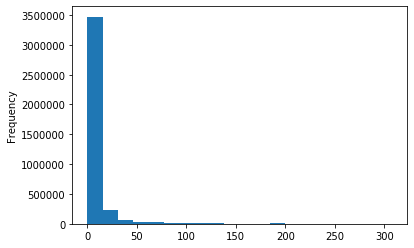

In [76]:
dataoct2.price.plot(kind='hist', bins=20)

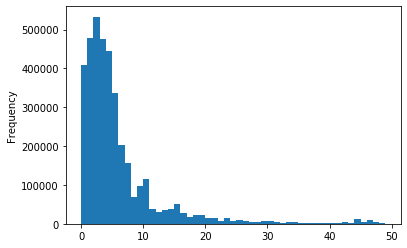

In [77]:
dataoct1.price.plot(kind='hist', bins=range(0,50)) #maximum data in the range of 0-8

In [78]:
#write ecdf function

def ecdf(data) :
    x = np.sort(data)
    y = np.arange(1, len(data) + 1)/len(data)
    return x, y

In [79]:
#plotting the percentiles
percentiles = np.array([25, 50, 75, 80, 90, 95, 97.5])
vals = np.percentile(dataoct2.price[dataoct2.price<15], percentiles)
vals

array([ 1.94,  3.89,  5.56,  6.33,  9.21, 10.63, 12.54])

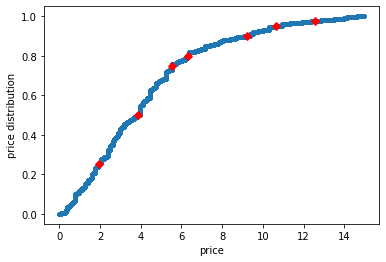

In [80]:
xax, yax = ecdf(dataoct2.price[dataoct2.price<15])
#plot ecdf for price distribution
_ = plt.plot(xax, yax, marker='.', linestyle='none' )
_ = plt.plot(vals, percentiles/100, marker='D', color='red',
         linestyle='none')
_ = plt.xlabel('price')
_ = plt.ylabel('price distribution')


In [81]:
xax1, yax1 = ecdf(dataoct2.price)
vals1 = np.percentile(dataoct2.price, percentiles)
vals1

array([ 2.22 ,  4.11 ,  7.14 ,  9.178, 15.71 , 29.29 , 55.56 ])

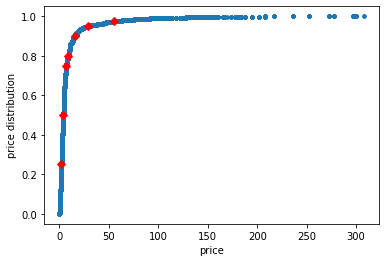

In [82]:
#plot ecdf for price distribution
_ = plt.plot(xax1, yax1, marker='.', linestyle='none' )
_ = plt.plot(vals1, percentiles/100, marker='D', color='red',
         linestyle='none')
_ = plt.xlabel('price')
_ = plt.ylabel('price distribution')

In [84]:
#pivot table exploration, find the count of each event_type by product_id, category_code, brand
subsetdata = dataoct2[['event_type', 'product_id']]
#subsetdata['event_type'] = subsetdata['event_type'].astype('category')
#subsetdata['event_type'].set_categories(["cart","view","purchase","remove_from_cart"],inplace=True)

pivotbyproduct = pd.pivot_table(subsetdata,index=['product_id'], columns=['event_type'], values=['event_type'], aggfunc=len, fill_value=0)

In [85]:
#sort by purchase i ndescending order, find top 10 products with max purchase
pivotbyproduct.sort_values('purchase', ascending=False).head(10)

event_type,cart,purchase,remove_from_cart,view
product_id,,,,
5854897,3682,700,956,687
5700037,4481,695,1155,2324
5751422,2219,644,957,4093
5802432,4273,640,956,900
5792800,1937,592,824,3405
5686925,3822,583,958,879
5751383,2045,566,933,4715
5304,1875,524,602,774
5815662,2717,498,856,1669


In [86]:
#sort by remove i ndescending order find top 20 products with max remove from cart
pivotbyproduct.sort_values('remove_from_cart', ascending=False).head(10)

event_type,cart,purchase,remove_from_cart,view
product_id,,,,
5700037,4481,695,1155,2324
5686925,3822,583,958,879
5751422,2219,644,957,4093
5854897,3682,700,956,687
5802432,4273,640,956,900
5751383,2045,566,933,4715
5815662,2717,498,856,1669
5792800,1937,592,824,3405
5809912,1571,328,816,4936


In [87]:
#cleaning Nov data
#find out the duplicate rows in nov data
datanov[datanov.duplicated(keep=False)].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
5,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
90,2019-11-01 00:06:22,remove_from_cart,5826980,1487580005671109489,NaN,masura,3.95,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
91,2019-11-01 00:06:22,remove_from_cart,5826980,1487580005671109489,NaN,masura,3.95,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
160,2019-11-01 00:13:16,remove_from_cart,5749153,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf


In [88]:
#remove duplicate rows from nov data
datanov1 = datanov.drop_duplicates()

In [89]:
datanov1.shape

(4389144, 9)

In [90]:
datanov.shape

(4635837, 9)

In [91]:
#find missing values in columns of nov data
assert datanov1.event_time.notnull().all()

In [92]:
assert datanov1.product_id.notnull().all()

In [93]:
assert datanov1.category_id.notnull().all()

In [94]:
assert datanov1.user_session.notnull().all()

AssertionError: 

In [95]:
len(datanov1[datanov1.user_session.isnull()]) #there are 755 rows with null session value

755

In [96]:
#drop rows with null session value as it is only 755 rows
datanov1 = datanov1[datanov1.user_session.notnull()]
datanov1.shape

(4388389, 9)

In [97]:
assert datanov1.event_type.notnull().all()

In [98]:
datanov1.category_code.value_counts(dropna=False) #lot of null category_code

NaN                                       4314836
appliances.environment.vacuum               31319
stationery.cartrige                         12645
apparel.glove                               10232
furniture.living_room.cabinet                7124
accessories.bag                              5796
furniture.bathroom.bath                      4688
appliances.personal.hair_cutter               811
accessories.cosmetic_bag                      589
furniture.living_room.chair                   182
appliances.environment.air_conditioner        167
Name: category_code, dtype: int64

In [99]:
datanov1.brand.value_counts(dropna=False) #lot of null brands 

NaN          1879673
runail        304861
grattol       192947
irisk         191319
masura        173276
              ...   
shifei             3
macadamia          2
footlogix          2
dessata            2
ibd                1
Name: brand, Length: 240, dtype: int64

In [100]:
assert datanov1.user_id.notnull().all()

In [101]:
datanov1.price.describe()

count    4.388389e+06
mean     8.308831e+00
std      1.916141e+01
min     -7.937000e+01
25%      1.980000e+00
50%      3.970000e+00
75%      6.650000e+00
max      3.277800e+02
Name: price, dtype: float64

In [102]:
len(datanov1[datanov1.price <0 ])

16

In [103]:
#drop rows with negative price only 16 of them
datanov2 = datanov1[datanov1.price >=0 ]

In [104]:
len(datanov2[datanov2.price == 0])

11455

In [105]:
len(dataoct1[dataoct1.price==0]) #there are more data in nov with zero price - thanksgiving sale??

6026

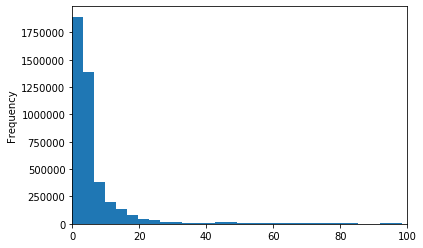

In [106]:
datanov2.price.plot(kind='hist', xlim=(0,100), bins=100) #most of the data lies in price range 0 - 35

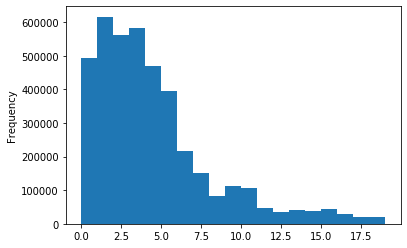

In [107]:
datanov2.price.plot(kind='hist', bins=range(0,20))

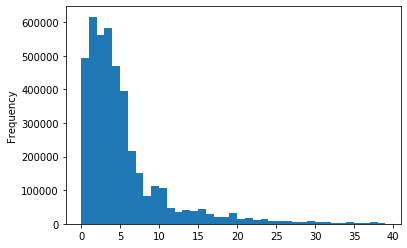

In [108]:
datanov2.price.plot(kind='hist', bins=range(0,40))

In [109]:
#find if category id and category code are related
#get all rows with notnull category code
datanov3 = datanov2[datanov2.category_code.notnull()]

In [110]:
datanov3.shape

(73553, 9)

In [111]:
datanov3.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
66,2019-11-01 00:04:33,purchase,5766980,1487580013053083824,stationery.cartrige,italwax,1.98,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
67,2019-11-01 00:04:33,purchase,5767494,1487580013053083824,stationery.cartrige,italwax,2.14,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
68,2019-11-01 00:04:33,purchase,5775813,1487580013053083824,stationery.cartrige,italwax,1.98,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
69,2019-11-01 00:04:33,purchase,5775814,1487580013053083824,stationery.cartrige,italwax,1.98,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
242,2019-11-01 00:16:56,view,5885596,1487580006350586771,appliances.environment.vacuum,polarus,102.38,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf
252,2019-11-01 00:18:27,view,5743974,1487580013053083824,stationery.cartrige,italwax,1.98,370706182,6223f8f8-7eb1-498a-b35e-8292ea3c7b9e
264,2019-11-01 00:20:31,view,4965,1487580010695884882,accessories.bag,NaN,34.52,513114494,4d9cd992-d34d-4dc4-abe8-0f941ae1fa97
270,2019-11-01 00:20:54,remove_from_cart,5855510,1487580006350586771,appliances.environment.vacuum,max,95.08,341955890,fe14c5f3-60cd-4363-a577-ce29ca523f1c
274,2019-11-01 00:21:11,view,5855510,1487580006350586771,appliances.environment.vacuum,max,95.08,341955890,fe14c5f3-60cd-4363-a577-ce29ca523f1c
277,2019-11-01 00:21:26,view,5861994,1487580010695884882,accessories.bag,NaN,46.02,513114494,4d9cd992-d34d-4dc4-abe8-0f941ae1fa97


In [112]:
datanov3.groupby([datanov3.category_code,datanov3.category_id]).size()

category_code                           category_id        
accessories.bag                         1487580010695884882     5796
accessories.cosmetic_bag                1921723506584715388      589
apparel.glove                           1487580012071616651      160
                                        2007399943458784057    10072
appliances.environment.air_conditioner  1487580008221246441       23
                                        1783999067181810204      144
appliances.environment.vacuum           1487580006350586771    31319
appliances.personal.hair_cutter         1487580008070251489      811
furniture.bathroom.bath                 1487580011970953351     1963
                                        1487580012147114126      160
                                        1487580012759482531       49
                                        2018287324474901238      559
                                        2193074740686488401     1957
furniture.living_room.cabinet           219

In [113]:
len(datanov2.category_id.unique())#there are 491 unique category ids

491

In [114]:
len(datanov3.category_id.unique())
#cannot derive category code from category id as not all category codes are present in datanov3

16

In [115]:
#fill null category code with other value
datanov2.category_code = datanov2.category_code.astype(str)

In [116]:
datanov2.category_code = datanov2.category_code.replace('nan', 'other')
datanov2.category_code.value_counts()

other                                     4314820
appliances.environment.vacuum               31319
stationery.cartrige                         12645
apparel.glove                               10232
furniture.living_room.cabinet                7124
accessories.bag                              5796
furniture.bathroom.bath                      4688
appliances.personal.hair_cutter               811
accessories.cosmetic_bag                      589
furniture.living_room.chair                   182
appliances.environment.air_conditioner        167
Name: category_code, dtype: int64

In [117]:
datanov2.category_code = datanov2.category_code.astype('category')
datanov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4388373 entries, 0 to 4635836
Data columns (total 9 columns):
event_time       datetime64[ns]
event_type       category
product_id       int64
category_id      int64
category_code    category
brand            object
price            float64
user_id          int64
user_session     object
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 276.2+ MB


In [118]:
#create dictionary of brand and product_id
notnullbrandnov = datanov2[datanov2.brand.notnull()]

In [119]:
brandnovdict=dict(zip(notnullbrandnov.product_id,notnullbrandnov.brand))
len(brandnovdict)

24309

In [120]:
len(datanov2[datanov2.brand.isnull()])

1879657

In [121]:
#fill brand from dictionary
datanov2.brand = datanov2.product_id.map(brandnovdict)
len(datanov2[datanov2.brand.isnull()])

1874057

In [122]:
#5600 rows got filled with brand
#fill remaining nan with missing
datanov2.brand = datanov2.brand.astype(str)
datanov2.brand = datanov2.brand.replace('nan', 'missing')
datanov2.brand.value_counts()

missing      1874057
runail        305731
grattol       192951
irisk         191413
masura        173276
              ...   
shifei             3
footlogix          2
macadamia          2
dessata            2
ibd                1
Name: brand, Length: 240, dtype: int64

In [123]:
datanov2.brand = datanov2.brand.astype('category')

In [124]:
#draw plots of multiple columns price < 10, price < 20 etc to see their trend over different days of the week

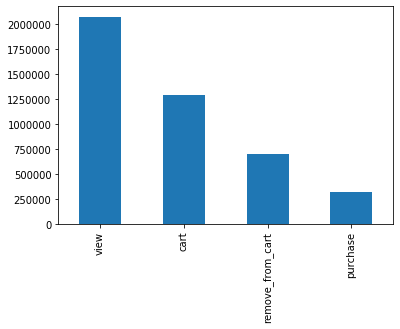

In [125]:
datanov2.event_type.value_counts().plot(kind='bar')

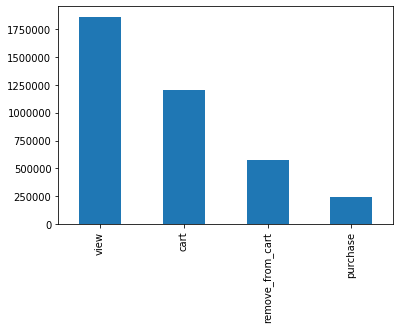

In [126]:
dataoct2.event_type.value_counts().plot(kind='bar')

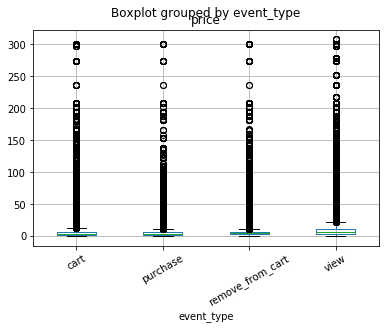

In [127]:
#draw boxplot of price wrt event_type
dataoct2.boxplot('price', 'event_type', rot=30)

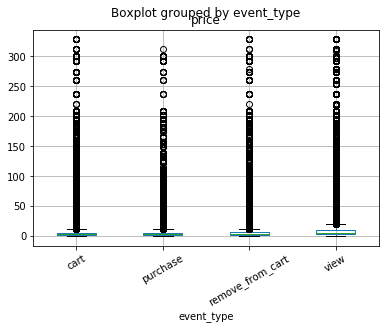

In [128]:
datanov2.boxplot('price', 'event_type', rot=30)

In [129]:
#find view to purchase percentage in Oct vs Nov and plot them 


In [130]:
#count daily purchase
datanov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4388373 entries, 0 to 4635836
Data columns (total 9 columns):
event_time       datetime64[ns]
event_type       category
product_id       int64
category_id      int64
category_code    category
brand            category
price            float64
user_id          int64
user_session     object
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 251.1+ MB


In [131]:
datanov4 = datanov2.copy().set_index('event_time')

In [132]:
dailypurchase = datanov4.resample('D').event_type.count() #how to get only purchase count

In [133]:
dailypurchase.head()

event_time
2019-11-01    112138
2019-11-02    107948
2019-11-03    119425
2019-11-04    130273
2019-11-05    141810
Freq: D, Name: event_type, dtype: int64

In [134]:
#one-hot encoding to get all event_type categories in 4 separate columns
datanov5 = datanov4.copy()
datanov5 = pd.get_dummies(datanov5, columns=['event_type'])

In [135]:
datanov5.head()

,product_id,category_id,category_code,brand,price,user_id,user_session,event_type_cart,event_type_purchase,event_type_remove_from_cart,event_type_view
event_time,,,,,,,,,,,
2019-11-01 00:00:02,5802432,1487580009286598681,other,missing,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0,0,0,1
2019-11-01 00:00:09,5844397,1487580006317032337,other,missing,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,0,0,0
2019-11-01 00:00:10,5837166,1783999064103190764,other,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0,0,0,1
2019-11-01 00:00:11,5876812,1487580010100293687,other,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1,0,0,0
2019-11-01 00:00:24,5826182,1487580007483048900,other,missing,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0,0,1,0


In [136]:
dataoct4 = dataoct1.copy()
dataoct4['event_time'] = pd.to_datetime(dataoct4['event_time'], infer_datetime_format=True, errors='ignore') #takes lot of time

In [137]:
dataoct5 = dataoct4.copy()
dataoct5 = pd.get_dummies(dataoct5, columns=['event_type'])

In [138]:
dataoct5 = dataoct5.set_index(['event_time'])
dataoct5.head()

,product_id,category_id,category_code,brand,price,user_id,user_session,event_type_cart,event_type_purchase,event_type_remove_from_cart,event_type_view
event_time,,,,,,,,,,,
2019-10-01 00:00:00,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,1,0,0,0
2019-10-01 00:00:03,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,1,0,0,0
2019-10-01 00:00:07,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,1,0,0,0
2019-10-01 00:00:07,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,1,0,0,0
2019-10-01 00:00:15,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,1,0,0,0


In [139]:
dailypurchaseoct = dataoct5.resample('D').event_type_purchase.count() #how to get only purchase count
dailypurchaseoct.head()

event_time
2019-10-01    134927
2019-10-02    190569
2019-10-03    118650
2019-10-04    109957
2019-10-05    100748
Freq: D, Name: event_type_purchase, dtype: int64

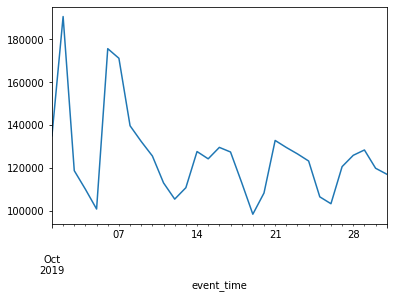

In [140]:
#plot the purchase trend
dailypurchaseoct.plot()

In [ ]:
#hourly purchase trend in Oct


In [141]:
dataoct5.reset_index().head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type_cart,event_type_purchase,event_type_remove_from_cart,event_type_view
0,2019-10-01 00:00:00,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,1,0,0,0
1,2019-10-01 00:00:03,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,1,0,0,0
2,2019-10-01 00:00:07,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,1,0,0,0
3,2019-10-01 00:00:07,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,1,0,0,0
4,2019-10-01 00:00:15,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,1,0,0,0


In [140]:
datanov5.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4388373 entries, 2019-11-01 00:00:02 to 2019-11-30 23:59:58
Data columns (total 11 columns):
product_id                     int64
category_id                    int64
category_code                  category
brand                          category
price                          float64
user_id                        int64
user_session                   object
event_type_cart                uint8
event_type_purchase            uint8
event_type_remove_from_cart    uint8
event_type_view                uint8
dtypes: category(2), float64(1), int64(3), object(1), uint8(4)
memory usage: 230.2+ MB


In [394]:
#subset the data for purchase
purchasenov = datanov5[datanov5.event_type_purchase == 1]
purchasenov.head()

,product_id,category_id,category_code,brand,price,user_id,user_session,event_type_cart,event_type_purchase,event_type_remove_from_cart,event_type_view
event_time,,,,,,,,,,,
2019-11-01 00:01:57,5839412,1487580006551913373,other,lovely,3.16,460304619,9f777569-bdf3-47e5-a3d4-dfc26beb29cb,0,1,0,0
2019-11-01 00:01:57,5823969,1487580005268456287,other,uno,17.46,460304619,9f777569-bdf3-47e5-a3d4-dfc26beb29cb,0,1,0,0
2019-11-01 00:01:57,5810480,1487580011283087468,other,missing,22.54,460304619,9f777569-bdf3-47e5-a3d4-dfc26beb29cb,0,1,0,0
2019-11-01 00:04:33,24380,1487580012994363565,other,depilflax,5.24,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f,0,1,0,0
2019-11-01 00:04:33,26765,1487580013522845895,other,ardell,7.16,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f,0,1,0,0


In [142]:
purchasenov.info()#out of 4million data, 322K is the purchase count

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322253 entries, 2019-11-01 00:01:57 to 2019-11-30 23:24:54
Data columns (total 11 columns):
product_id                     322253 non-null int64
category_id                    322253 non-null int64
category_code                  322253 non-null category
brand                          322253 non-null category
price                          322253 non-null float64
user_id                        322253 non-null int64
user_session                   322253 non-null object
event_type_cart                322253 non-null uint8
event_type_purchase            322253 non-null uint8
event_type_remove_from_cart    322253 non-null uint8
event_type_view                322253 non-null uint8
dtypes: category(2), float64(1), int64(3), object(1), uint8(4)
memory usage: 16.9+ MB


In [143]:
#find negative price data
purchasenov[purchasenov.price<0]

,product_id,category_id,category_code,brand,price,user_id,user_session,event_type_cart,event_type_purchase,event_type_remove_from_cart,event_type_view
event_time,,,,,,,,,,,


In [395]:
dailypurchasenov = datanov5.resample('D').event_type_purchase.count() #how to get only purchase count
dailypurchasenov

event_time
2019-11-01    112138
2019-11-02    107948
2019-11-03    119425
2019-11-04    130273
2019-11-05    141810
2019-11-06    134756
2019-11-07    179379
2019-11-08    162066
2019-11-09    108192
2019-11-10    114671
2019-11-11    131191
2019-11-12    124530
2019-11-13    132286
2019-11-14    126872
2019-11-15    116972
2019-11-16    107167
2019-11-17    119917
2019-11-18    143065
2019-11-19    134222
2019-11-20    132689
2019-11-21    207671
2019-11-22    255954
2019-11-23    187899
2019-11-24    195051
2019-11-25    134585
2019-11-26    127882
2019-11-27    138370
2019-11-28    212993
2019-11-29    195832
2019-11-30    152567
Freq: D, Name: event_type_purchase, dtype: int64

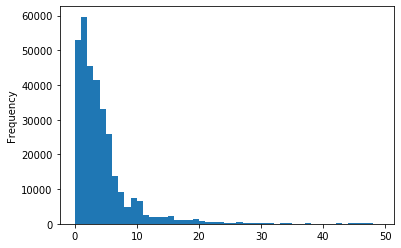

In [145]:
#plot the histogram for price distribution in purchase data
purchasenov.price.plot(kind='hist', bins=range(0,50))

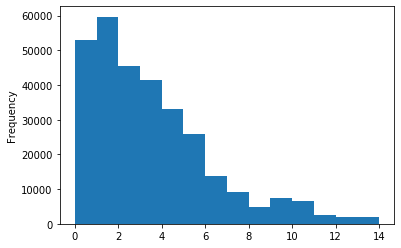

In [146]:
#plot the histogram for price distribution in purchase data
purchasenov.price.plot(kind='hist', bins=range(0,15))

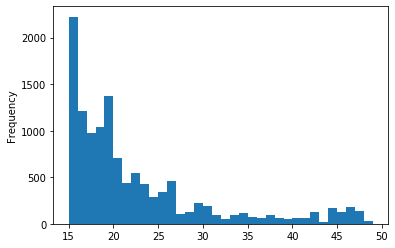

In [147]:
purchasenov.price.plot(kind='hist', bins=range(15,50))

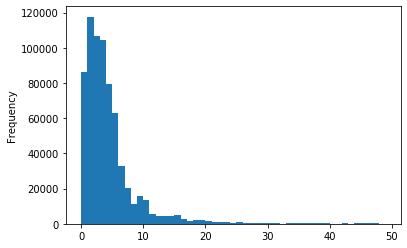

In [148]:
datanov5[datanov5.event_type_remove_from_cart==1].price.plot(kind='hist', bins=range(0,50))

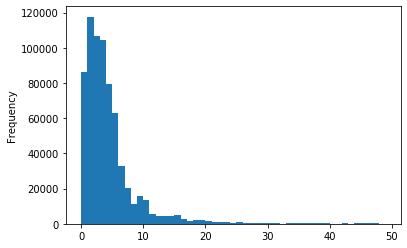

In [149]:
datanov5[datanov5.event_type_remove_from_cart==1].price.plot(kind='hist', bins=range(0,50))

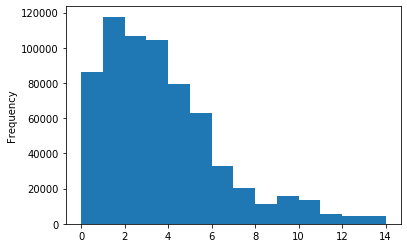

In [150]:
datanov5[datanov5.event_type_remove_from_cart==1].price.plot(kind='hist', bins=range(0,15))

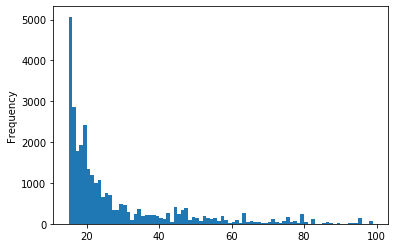

In [151]:
datanov5[datanov5.event_type_remove_from_cart==1].price.plot(kind='hist', bins=range(15,100))

In [152]:
#get proportion of each event for different price ranges
#should we add more columns like price<1 and purchase=1, price<1 and cart=1 etc. for each event? 

In [153]:
#get count of each event for price range 0-1
len(datanov5[(datanov5.price<1) & (datanov5.event_type_purchase==1)])

52873

In [154]:
len(datanov5[(datanov5.price<1) & (datanov5.event_type_cart==1)])

213611

In [155]:
len(datanov5[(datanov5.price<1) & (datanov5.event_type_remove_from_cart==1)])

86394

In [156]:
len(datanov5[(datanov5.price<1) & (datanov5.event_type_view==1)])

141586

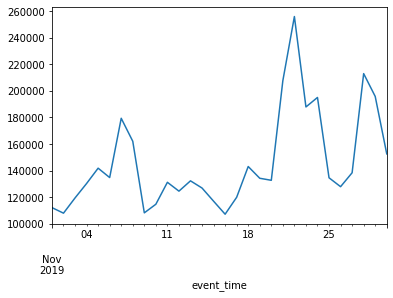

In [157]:
dailypurchasenov.plot()#purchase picks up near thanksgiving

In [158]:
#resample hourly data 
hourlypurchasenov = datanov5.resample('H').event_type_purchase.count()
hourlypurchasenov

event_time
2019-11-01 00:00:00      857
2019-11-01 01:00:00     1046
2019-11-01 02:00:00     1187
2019-11-01 03:00:00     1493
2019-11-01 04:00:00     2000
                       ...  
2019-11-30 19:00:00    12078
2019-11-30 20:00:00    10290
2019-11-30 21:00:00     6172
2019-11-30 22:00:00     3044
2019-11-30 23:00:00     1813
Freq: H, Name: event_type_purchase, Length: 720, dtype: int64

In [1]:
hourlypurchaseoct = dataoct5.resample('H').event_type_purchase.count()
hourlypurchaseoct

NameError: name 'dataoct5' is not defined

In [159]:
hourlypurchasenovdf = pd.DataFrame(hourlypurchasenov)
hourlypurchasenovdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2019-11-01 00:00:00 to 2019-11-30 23:00:00
Freq: H
Data columns (total 1 columns):
event_type_purchase    720 non-null int64
dtypes: int64(1)
memory usage: 11.2 KB


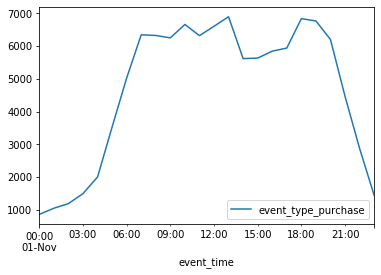

In [160]:
hourlypurchasenovdf['2019-11-01'].plot()

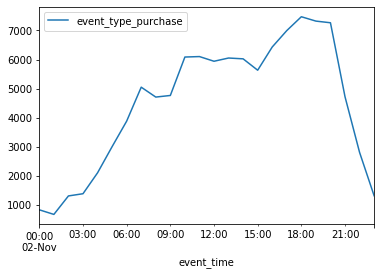

In [161]:
hourlypurchasenovdf['2019-11-02'].plot()

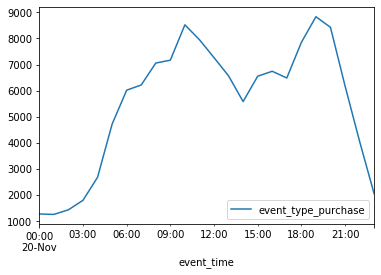

In [162]:
hourlypurchasenovdf['2019-11-20'].plot()

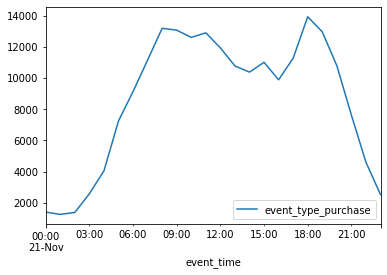

In [163]:
hourlypurchasenovdf['2019-11-21'].plot()

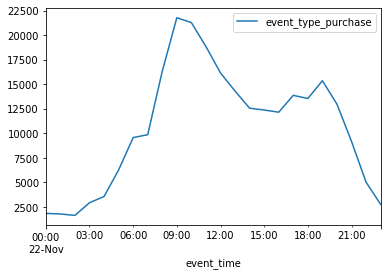

In [164]:
hourlypurchasenovdf['2019-11-22'].plot()

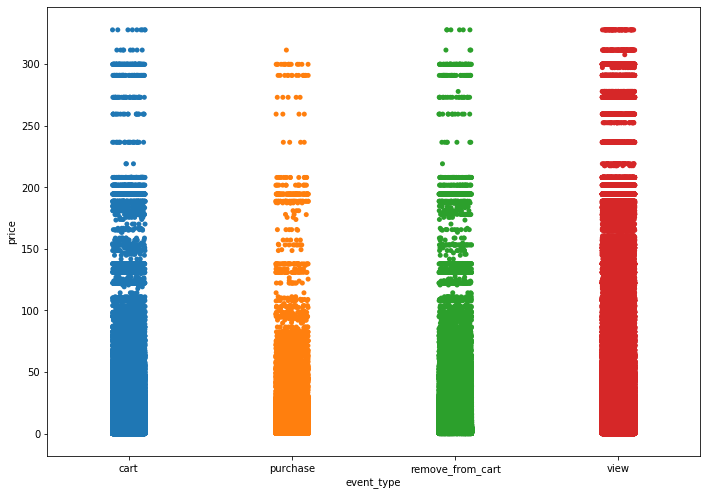

In [165]:
#create strip plot to show distribution of price variable against event_type
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(x='event_type', y='price', jitter=True, data=datanov4, ax=ax)

                    


In [166]:
sns.stripplot(x='event_type', y='price', jitter=True, data=dataoct4, ax=ax)


In [167]:
#create histogram for each event type 

In [168]:
#pivot table exploration, find the count of each event_type by product_id, category_code, brand
subsetdatanov = datanov2[['event_type', 'product_id']]

pivotbyproductnov = pd.pivot_table(subsetdatanov,index=['product_id'], columns=['event_type'], values=['event_type'], aggfunc=len, fill_value=0)

In [169]:
#sort by purchase i ndescending order, find top 10 products with max purchase
#top 10 products that were purchased in Nov
pivotbyproductnov.sort_values('purchase', ascending=False).head(10)

event_type,cart,purchase,remove_from_cart,view
product_id,,,,
5809910,7354,2138,2396,18813
5854897,5468,1165,1313,1322
5833330,2755,1012,827,2377
5751422,3120,934,1334,5205
5700037,5901,873,1359,2496
5815662,4120,866,1427,3029
5304,2775,865,813,1206
5809912,3301,862,1512,6380
5802432,5326,805,1340,1564


In [170]:
#top 10 products that were removed from cart in Nov. 
pivotbyproductnov.sort_values('remove_from_cart', ascending=False).head(10)

event_type,cart,purchase,remove_from_cart,view
product_id,,,,
5809910,7354,2138,2396,18813
5809912,3301,862,1512,6380
5815662,4120,866,1427,3029
5700037,5901,873,1359,2496
5802432,5326,805,1340,1564
5751422,3120,934,1334,5205
5854897,5468,1165,1313,1322
5751383,2758,802,1235,5245
5849033,2802,761,1172,4616


In [171]:
#purchase trend weekly
weeklypurchasenov = datanov5.resample('W').event_type_purchase.count() #how to get only purchase count
weeklypurchasenov


event_time
2019-11-03     339511
2019-11-10     971147
2019-11-17     858935
2019-11-24    1256551
2019-12-01     962229
Freq: W-SUN, Name: event_type_purchase, dtype: int64

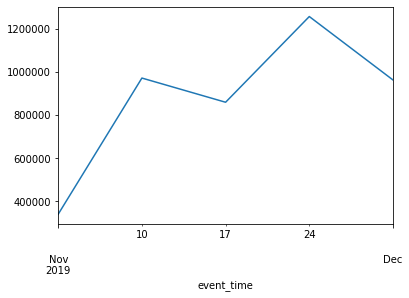

In [172]:
weeklypurchasenov.plot() #thanksgiving increase is seen 

In [173]:
#find top 10 category of products that are purchased more
bycategorynov = datanov2[['event_type', 'category_code']]

pivotbycategorynov = pd.pivot_table(bycategorynov,index=['category_code'], columns=['event_type'], values=['event_type'], aggfunc=len, fill_value=0)
pivotbycategorynov.sort_values('purchase', ascending=False)


event_type,cart,purchase,remove_from_cart,view
category_code,,,,
other,1274777,318286,694682,2027075
stationery.cartrige,5136,1538,1713,4258
apparel.glove,3328,1115,1751,4038
appliances.environment.vacuum,3887,881,1995,24556
furniture.bathroom.bath,1013,271,479,2925
furniture.living_room.cabinet,454,67,261,6342
accessories.bag,215,50,126,5405
accessories.cosmetic_bag,103,23,58,405
appliances.environment.air_conditioner,37,14,16,100


In [174]:
#top categories that are removed from cart
pivotbycategorynov.sort_values('remove_from_cart', ascending=False)

event_type,cart,purchase,remove_from_cart,view
category_code,,,,
other,1274777,318286,694682,2027075
appliances.environment.vacuum,3887,881,1995,24556
apparel.glove,3328,1115,1751,4038
stationery.cartrige,5136,1538,1713,4258
furniture.bathroom.bath,1013,271,479,2925
furniture.living_room.cabinet,454,67,261,6342
accessories.bag,215,50,126,5405
accessories.cosmetic_bag,103,23,58,405
appliances.personal.hair_cutter,47,5,21,738


In [175]:
#find top 10 brands that are purchased more
bybrandnov = datanov2[['event_type', 'brand']]

pivotbybrandnov = pd.pivot_table(bybrandnov,index=['brand'], columns=['event_type'], values=['event_type'], aggfunc=len, fill_value=0)
pivotbybrandnov.sort_values('purchase', ascending=False).head(10)

event_type,cart,purchase,remove_from_cart,view
brand,,,,
missing,556775,137622,304464,875196
runail,105008,26028,50140,124555
irisk,62733,16364,34240,78076
grattol,53191,13613,29996,96151
bpw.style,42142,13145,21658,48146
masura,53842,11435,38731,69268
ingarden,29563,7797,18762,40819
freedecor,22661,5996,12868,29235
uno,16514,4717,8395,27471


In [176]:
#top 10 brands that are removed from cart
pivotbybrandnov.sort_values('remove_from_cart', ascending=False).head(10)

event_type,cart,purchase,remove_from_cart,view
brand,,,,
missing,556775,137622,304464,875196
runail,105008,26028,50140,124555
masura,53842,11435,38731,69268
irisk,62733,16364,34240,78076
grattol,53191,13613,29996,96151
bpw.style,42142,13145,21658,48146
ingarden,29563,7797,18762,40819
freedecor,22661,5996,12868,29235
haruyama,13634,3254,9285,19295


In [177]:
#user behavior on estore - purchase or not purchase
#we can find the probability of purchase by finding the total number of purchase events and divide it by the total number of events
#we can treat the purchase behavior as a binomial distribution. We can do repeated bernoulli trials for finding the success (purchase event)
#rate. 
purchaseprobability = np.sum(dataoct5.event_type_purchase)/np.sum(dataoct5.event_type_view)
purchaseprobability

0.1317263231384764

In [178]:
datanov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4388373 entries, 0 to 4635836
Data columns (total 9 columns):
event_time       datetime64[ns]
event_type       category
product_id       int64
category_id      int64
category_code    category
brand            category
price            float64
user_id          int64
user_session     object
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 251.1+ MB


In [179]:
purchaseprobabilityNov = np.sum(datanov5.event_type_purchase)/np.sum(datanov5.event_type_view)
purchaseprobabilityNov#higher probability of purchase in Nov but not a big difference

0.15522903837409152

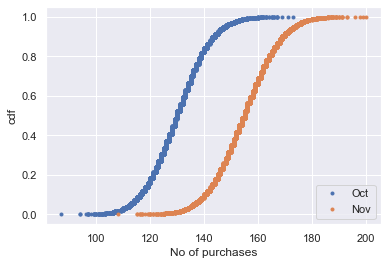

In [180]:
#calculate probability mass function for the number of purchases that can happen for 1000 events on the ecommerce site
#use binomial distribution to pick samples n=1000, p=0.063
np.random.seed(42)
sns.set()
n_purchases_oct=np.random.binomial(1000, 0.13, size=10000)
x, y = ecdf(n_purchases_oct)

n_purchases_nov=np.random.binomial(1000, 0.155, size=10000)
x1, y1 = ecdf(n_purchases_nov)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.xlabel('No of purchases')
_ = plt.ylabel('cdf')

_ = plt.legend(('Oct', 'Nov'), loc='lower right')

plt.show()


In [181]:
len(dataoct5.product_id.unique())

41899

In [182]:
#extract df containing only product, price and event types
dataoct6 = dataoct5.copy().reset_index()
productsoct = dataoct6[['product_id', 'price', 'event_type_view', 'event_type_cart', 'event_type_remove_from_cart', 'event_type_purchase']]
productsoct = productsoct[productsoct.price >= 0]
#productsoct.tail(20)

In [183]:
groupbyprod = productsoct.groupby(['product_id', 'price']).sum()
groupbyprod.head(10)

,,event_type_view,event_type_cart,event_type_remove_from_cart,event_type_purchase
product_id,price,,,,
3752,15.71,14.0,0.0,0.0,0.0
3762,19.37,387.0,187.0,79.0,50.0
3763,16.03,97.0,35.0,16.0,8.0
3771,15.08,6.0,0.0,0.0,0.0
3774,16.03,129.0,69.0,29.0,25.0
3776,16.03,102.0,31.0,19.0,4.0
3783,7.92,3.0,0.0,0.0,0.0
3788,12.54,1.0,0.0,0.0,0.0
3790,7.92,12.0,0.0,1.0,0.0


In [184]:
groupbyprod = groupbyprod.reset_index()
groupbyprod.head()

,product_id,price,event_type_view,event_type_cart,event_type_remove_from_cart,event_type_purchase
0,3752,15.71,14.0,0.0,0.0,0.0
1,3762,19.37,387.0,187.0,79.0,50.0
2,3763,16.03,97.0,35.0,16.0,8.0
3,3771,15.08,6.0,0.0,0.0,0.0
4,3774,16.03,129.0,69.0,29.0,25.0


Text(0, 0.5, 'no of purchase')

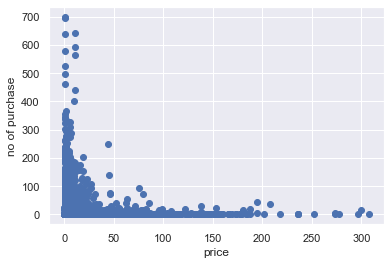

In [185]:
plt.scatter(groupbyprod.price, groupbyprod.event_type_purchase)
plt.xlabel('price')
plt.ylabel('no of purchase')

Text(0, 0.5, 'no of views')

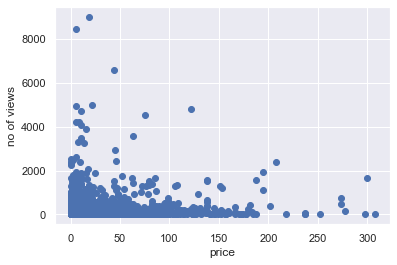

In [186]:
plt.scatter(groupbyprod.price, groupbyprod.event_type_view)
plt.xlabel('price')
plt.ylabel('no of views')

In [187]:
#views are more evenly distributed than purchase 


In [189]:
productsoct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3889108 entries, 0 to 3889127
Data columns (total 6 columns):
product_id                     int64
price                          float64
event_type_view                uint8
event_type_cart                uint8
event_type_remove_from_cart    uint8
event_type_purchase            uint8
dtypes: float64(1), int64(1), uint8(4)
memory usage: 103.9 MB


In [201]:
productslessthan15 = productsoct.copy()
t = productslessthan15.price <= 15.7
t

0          True
1          True
2          True
3          True
4          True
           ... 
3889123    True
3889124    True
3889125    True
3889126    True
3889127    True
Name: price, Length: 3889108, dtype: bool

In [202]:
productslessthan15 = productsoct[t] #the 90th percentile
productslessthan15.shape

(3481425, 6)

In [211]:
k = (productsoct.price > 15.7) & (productsoct.price <= 55.56)

prodsbet90and97p = productsoct[k]


In [234]:
purchasetoviewratioless15 = sum(productslessthan15.event_type_purchase)/sum(productslessthan15.event_type_view)
purchasetoviewratioless15

0.1509737331677377

In [235]:
purchasetocartratioless15 = sum(productslessthan15.event_type_purchase)/sum(productslessthan15.event_type_cart)
purchasetocartratioless15

0.20509840641982655

In [213]:
removetocartratioless15 = sum(productslessthan15.event_type_remove_from_cart)/sum(productslessthan15.event_type_cart)
removetocartratioless15

0.4830368159900587

In [236]:
purchasetoviewratiogrt15 = sum(prodsbet90and97p.event_type_purchase)/sum(prodsbet90and97p.event_type_view)
purchasetoviewratiogrt15

0.04378382240002857

In [238]:
purchasetocartwratiogrt15 = sum(prodsbet90and97p.event_type_purchase)/sum(prodsbet90and97p.event_type_cart)
purchasetocartwratiogrt15

0.1794064912730067

In [216]:
removetocartratiogrt15 = sum(prodsbet90and97p.event_type_remove_from_cart)/sum(prodsbet90and97p.event_type_cart)
removetocartratiogrt15

0.4104431190310659

In [217]:
#get the numbers for Nov
novsale = datanov5.copy()
novsale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4388373 entries, 2019-11-01 00:00:02 to 2019-11-30 23:59:58
Data columns (total 11 columns):
product_id                     int64
category_id                    int64
category_code                  category
brand                          category
price                          float64
user_id                        int64
user_session                   object
event_type_cart                uint8
event_type_purchase            uint8
event_type_remove_from_cart    uint8
event_type_view                uint8
dtypes: category(2), float64(1), int64(3), object(1), uint8(4)
memory usage: 230.2+ MB


In [218]:
#plotting the percentiles
xax2, yax2 = ecdf(datanov2.price)
vals2 = np.percentile(datanov2.price, percentiles)
vals2

array([ 1.98,  3.97,  6.65,  8.43, 15.08, 26.83, 53.81])

In [221]:
novsaleless15 = datanov5[datanov5.price <= 15.08]
novsaleless15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3954303 entries, 2019-11-01 00:00:02 to 2019-11-30 23:59:58
Data columns (total 11 columns):
product_id                     int64
category_id                    int64
category_code                  category
brand                          category
price                          float64
user_id                        int64
user_session                   object
event_type_cart                uint8
event_type_purchase            uint8
event_type_remove_from_cart    uint8
event_type_view                uint8
dtypes: category(2), float64(1), int64(3), object(1), uint8(4)
memory usage: 207.4+ MB


In [222]:
novsalegrt15 = datanov5[(datanov5.price > 15.08) & (datanov5.price <= 54.0)]
novsalegrt15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326156 entries, 2019-11-01 00:00:10 to 2019-11-30 23:59:47
Data columns (total 11 columns):
product_id                     326156 non-null int64
category_id                    326156 non-null int64
category_code                  326156 non-null category
brand                          326156 non-null category
price                          326156 non-null float64
user_id                        326156 non-null int64
user_session                   326156 non-null object
event_type_cart                326156 non-null uint8
event_type_purchase            326156 non-null uint8
event_type_remove_from_cart    326156 non-null uint8
event_type_view                326156 non-null uint8
dtypes: category(2), float64(1), int64(3), object(1), uint8(4)
memory usage: 17.1+ MB


In [228]:
novpurchasetoviewratioless15 = sum(novsaleless15.event_type_purchase)/sum(novsaleless15.event_type_view)
novpurchasetoviewratioless15

0.17715229223476037

In [233]:
novpurchasetocartratioless15 = sum(novsaleless15.event_type_purchase)/sum(novsaleless15.event_type_cart)
novpurchasetocartratioless15

0.25069435930993555

In [229]:
novremovetocartratioless15 = sum(novsaleless15.event_type_remove_from_cart)/sum(novsaleless15.event_type_cart)
novremovetocartratioless15

0.5445855399521479

In [230]:
novpurchasetoviewratiogrt15 = sum(novsalegrt15.event_type_purchase)/sum(novsalegrt15.event_type_view)
novpurchasetoviewratiogrt15

0.051144152250880925

In [232]:
novpurchasetocartratiogrt15 = sum(novsalegrt15.event_type_purchase)/sum(novsalegrt15.event_type_cart)
novpurchasetocartratiogrt15

0.24403603458999618

In [231]:
novremovetocartratiogrt15 = sum(novsalegrt15.event_type_remove_from_cart)/sum(novsalegrt15.event_type_cart)
novremovetocartratiogrt15

0.5283601853895388

In [273]:
#brands and categories affecting purchase
dataoct6 = dataoct5.copy().reset_index()
dataoct6.category_code = dataoct6.category_code.astype('str')
dataoct6.category_code.replace('nan', 'missing')
dataoct6.category_code = dataoct6.category_code.astype('category')
dataoct6.category_code.value_counts(dropna=False)
#groupbycategorybrands = dataoct5[['category_code', 'brand', 'event_type_purchase', 'event_type_view', 'event_type_cart', 'event_type_remove_from_cart']]
#groupbycategorybrands.reset_index().info()
#groupbycategorybrands.head()

nan                                       3823749
appliances.environment.vacuum               27079
stationery.cartrige                         12747
apparel.glove                                7036
furniture.living_room.cabinet                6141
accessories.bag                              5814
furniture.bathroom.bath                      4849
appliances.personal.hair_cutter               820
accessories.cosmetic_bag                      611
appliances.environment.air_conditioner        159
furniture.living_room.chair                   121
sport.diving                                    2
Name: category_code, dtype: int64

In [272]:
groupbycategorybrands = dataoct6.groupby('category_code')['event_type_purchase'].sum()
groupbycategorybrands

category_code
accessories.bag                               40.0
accessories.cosmetic_bag                      20.0
apparel.glove                                726.0
appliances.environment.air_conditioner         4.0
appliances.environment.vacuum                797.0
appliances.personal.hair_cutter                8.0
furniture.bathroom.bath                      244.0
furniture.living_room.cabinet                 52.0
furniture.living_room.chair                    0.0
nan                                       242008.0
sport.diving                                   0.0
stationery.cartrige                         1382.0
Name: event_type_purchase, dtype: float64

In [427]:
#missing category is purchased most. this is not very helpful data
#find if certain brands are getting purchased more
dataoct6[dataoct6.event_type_purchase == 1].brand.value_counts(dropna=False)

NaN          100559
runail        21920
irisk         15632
masura        11319
bpw.style      9506
              ...  
sun               1
moyou             1
sanoto            1
bosnic            1
lunaris           1
Name: brand, Length: 211, dtype: int64

In [277]:
dataoct6.groupby('brand')['event_type_purchase'].sum().sort_values(ascending=False)

brand
runail       21920.0
irisk        15632.0
masura       11319.0
bpw.style     9506.0
grattol       6438.0
              ...   
zab              0.0
pueen            0.0
blise            0.0
uralsoap         0.0
vl-gel           0.0
Name: event_type_purchase, Length: 240, dtype: float64

In [ ]:
#top 5 brands ruail, irisk, masura. bpw.style, grattol
#missing brand is the highest count 

In [287]:
#find total business made from products > 55.56 in oct, that is, 2.5% of products
percent25 = dataoct6[(dataoct6.event_type_purchase == 1) & (dataoct6.price >= 55.56)].price.sum()

In [288]:
percent975 = dataoct6[(dataoct6.event_type_purchase == 1) & (dataoct6.price < 55.56)].price.sum()

In [289]:
#2.5% of products make 10% of the business
percent25/percent975

0.10251858154448446

In [290]:
#checking for Nov
percentiletwo = datanov5[(datanov5.event_type_purchase == 1) & (datanov5.price >= 54.0)].price.sum()
percent975 = datanov5[(datanov5.event_type_purchase == 1) & (datanov5.price < 54.0)].price.sum()
percentiletwo/percent975

0.09591504737431225

In [294]:
day_names = dataoct5.index.day_name()
day_names

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday',
       'Thursday', 'Thursday', 'Thursday', 'Thursday'],
      dtype='object', name='event_time', length=3889128)

In [297]:
hr = dataoct5.index.hour
hr

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            23, 23, 23, 23, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='event_time', length=3889128)

In [315]:
dailyPurchaseOct = dataoct5.groupby(day_names)['event_type_purchase'].sum().sort_values(ascending=False)

In [309]:
day_names_nov = datanov5.index.day_name()

In [307]:
hr_nov = datanov5.index.hour

In [393]:
dailypurchasenov1 = datanov5.groupby(day_names_nov)['event_type_purchase'].sum().sort_values(ascending=False)
dailypurchasenov1

event_time
Friday       71989.0
Thursday     57193.0
Saturday     48616.0
Sunday       42390.0
Tuesday      34334.0
Wednesday    34205.0
Monday       33526.0
Name: event_type_purchase, dtype: float64

In [302]:
dataoct5.groupby([day_names,hr])['event_type_purchase'].sum().rename_axis(['day', 'hour']).sort_values(ascending=False)

day        hour
Wednesday  11      3253.0
Tuesday    12      3103.0
           11      3074.0
Wednesday  12      2899.0
Thursday   12      2842.0
                    ...  
Sunday     2        226.0
           1        210.0
Monday     0        202.0
Wednesday  0        199.0
Saturday   0        162.0
Name: event_type_purchase, Length: 168, dtype: float64

In [325]:
novSale = datanov5.groupby([day_names_nov,hr_nov])['event_type_purchase'].sum().rename_axis(['day', 'hour']).sort_values(ascending=False)
novSale.unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,347.0,904.0,598.0,910.0,1020.0,2073.0,3188.0,3445.0,4032.0,4761.0,...,3787.0,3738.0,4114.0,3508.0,3848.0,4267.0,4588.0,2298.0,1448.0,675.0
Monday,414.0,611.0,462.0,387.0,422.0,716.0,1217.0,1702.0,1413.0,1995.0,...,1919.0,1756.0,1971.0,1890.0,1582.0,1955.0,1815.0,1419.0,711.0,460.0
Saturday,427.0,353.0,503.0,650.0,862.0,1018.0,1827.0,1966.0,2652.0,2415.0,...,2851.0,2722.0,3084.0,3039.0,3103.0,3489.0,3058.0,1913.0,1329.0,624.0
Sunday,319.0,512.0,263.0,364.0,720.0,847.0,1285.0,1369.0,2148.0,2129.0,...,2342.0,2255.0,2489.0,2856.0,3379.0,3249.0,3140.0,1549.0,583.0,417.0
Thursday,506.0,385.0,313.0,499.0,793.0,1519.0,2156.0,2661.0,2804.0,3864.0,...,3250.0,2689.0,2997.0,3125.0,4077.0,3798.0,3135.0,1742.0,1139.0,818.0
Tuesday,380.0,355.0,444.0,487.0,601.0,881.0,1353.0,1896.0,1761.0,1928.0,...,2133.0,1582.0,1744.0,1554.0,2136.0,1558.0,2077.0,1444.0,808.0,402.0
Wednesday,324.0,151.0,320.0,363.0,620.0,1114.0,1619.0,1652.0,2148.0,2006.0,...,1664.0,1715.0,1982.0,1316.0,1613.0,1698.0,1881.0,1788.0,1102.0,548.0


In [317]:
type(dailyPurchaseOct)

pandas.core.series.Series

In [378]:
monthlysaleoct = pd.DataFrame(dailyPurchaseOct)
monthlysalenov = pd.DataFrame(dailypurchasenov1)
monthlysalenov.columns=['nov']
monthlysalenov

,nov
event_time,
Friday,71989.0
Thursday,57193.0
Saturday,48616.0
Sunday,42390.0
Tuesday,34334.0
Wednesday,34205.0
Monday,33526.0


In [379]:
monthlysaleoct.columns=['oct']
monthlysaleoct

,oct
event_time,
Wednesday,43258.0
Thursday,42973.0
Tuesday,42433.0
Monday,34572.0
Friday,29390.0
Sunday,28960.0
Saturday,23695.0


In [385]:
monthlysale1 = pd.merge(monthlysaleoct, monthlysalenov, how='left', on='event_time')
monthlysale1

,oct,nov
event_time,,
Wednesday,43258.0,34205.0
Thursday,42973.0,57193.0
Tuesday,42433.0,34334.0
Monday,34572.0,33526.0
Friday,29390.0,71989.0
Sunday,28960.0,42390.0
Saturday,23695.0,48616.0


In [388]:
monthlysale1 = monthlysale1.reset_index()
monthlysale1

,index,event_time,oct,nov
0,0,Wednesday,43258.0,34205.0
1,1,Thursday,42973.0,57193.0
2,2,Tuesday,42433.0,34334.0
3,3,Monday,34572.0,33526.0
4,4,Friday,29390.0,71989.0
5,5,Sunday,28960.0,42390.0
6,6,Saturday,23695.0,48616.0


In [390]:
sales = pd.melt(monthlysale1, id_vars=['event_time'], value_vars=['oct','nov'], value_name='sale', var_name='month')
sales

,event_time,month,sale
0,Wednesday,oct,43258.0
1,Thursday,oct,42973.0
2,Tuesday,oct,42433.0
3,Monday,oct,34572.0
4,Friday,oct,29390.0
5,Sunday,oct,28960.0
6,Saturday,oct,23695.0
7,Wednesday,nov,34205.0
8,Thursday,nov,57193.0
9,Tuesday,nov,34334.0


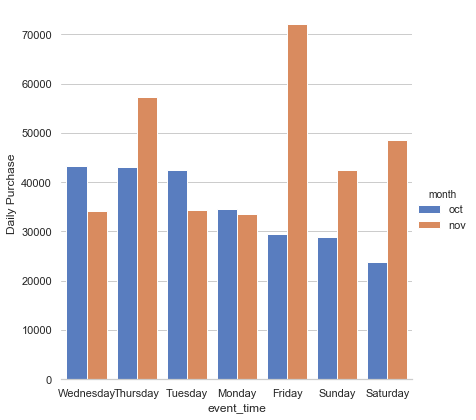

In [391]:
sns.set(style="whitegrid")

# Draw a nested barplot to show comparison between daily purchase count for Oct and Nov
g = sns.catplot(x="event_time", y="sale", hue="month", data=sales,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Daily Purchase")

In [ ]:
#Nov sees more sale on Friday due to Thanksgiving

In [401]:
dailypurchasenov.head()

event_time
2019-11-01    112138
2019-11-02    107948
2019-11-03    119425
2019-11-04    130273
2019-11-05    141810
Freq: D, Name: event_type_purchase, dtype: int64

In [402]:
dailypurchaseoct.head()

event_time
2019-10-01    134927
2019-10-02    190569
2019-10-03    118650
2019-10-04    109957
2019-10-05    100748
Freq: D, Name: event_type_purchase, dtype: int64

In [420]:
dailysaleoct = pd.DataFrame(dailypurchaseoct)
dailysalenov = pd.DataFrame(dailypurchasenov)
dailysalenov.columns=['nov']
dailysaleoct.columns=['oct']

In [421]:
dailysaleoct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2019-10-01 to 2019-10-31
Freq: D
Data columns (total 1 columns):
oct    31 non-null int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [409]:
dailysalenov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2019-11-01 to 2019-11-30
Freq: D
Data columns (total 1 columns):
nov    30 non-null int64
dtypes: int64(1)
memory usage: 480.0 bytes


In [422]:
dailysaleoct['day'] = dailysaleoct.index.day
dailysaleoct.tail()

,oct,day
event_time,,
2019-10-27,120539,27
2019-10-28,125821,28
2019-10-29,128302,29
2019-10-30,119777,30
2019-10-31,117010,31


In [423]:
dailysalenov['day'] = dailysalenov.index.day
dailysalenov.tail()

,nov,day
event_time,,
2019-11-26,127882,26
2019-11-27,138370,27
2019-11-28,212993,28
2019-11-29,195832,29
2019-11-30,152567,30


In [424]:
#merge the dailypurchaseoct and dailypurchasenov in one dataframe
dailysale = pd.merge(dailysaleoct, dailysalenov, how='left', on='day')
dailysale

,oct,day,nov
0,134927,1,112138.0
1,190569,2,107948.0
2,118650,3,119425.0
3,109957,4,130273.0
4,100748,5,141810.0
5,175575,6,134756.0
6,171089,7,179379.0
7,139601,8,162066.0
8,132266,9,108192.0
9,125497,10,114671.0


In [425]:
dsales = pd.melt(dailysale, id_vars=['day'], value_vars=['oct','nov'], value_name='sale', var_name='month')
dsales

,day,month,sale
0,1,oct,134927.0
1,2,oct,190569.0
2,3,oct,118650.0
3,4,oct,109957.0
4,5,oct,100748.0
...,...,...,...
57,27,nov,138370.0
58,28,nov,212993.0
59,29,nov,195832.0
60,30,nov,152567.0


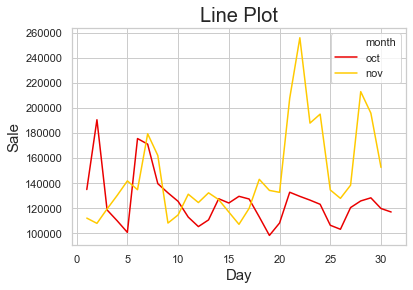

In [426]:
#plot daily purchase trend for oct and nov together
sns.set(style="whitegrid")

sns.lineplot(x = "day", y = "sale", data = dsales, hue = "month",
            palette = "hot", dashes = False, 
            markers = ["o", "<"],  legend="brief",)
 
plt.title("Line Plot", fontsize = 20) # for title
plt.xlabel("Day", fontsize = 15) # label for x-axis
plt.ylabel("Sale", fontsize = 15) # label for y-axis
plt.show()


In [ ]:
#To Do compare hourly sales in Oct for few days to see if there is any trend - week days and weekends